In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#导入必要的库

In [3]:
df1=pd.read_csv('K线导出_09633_日线数据.csv') 
df1=df1.iloc[2:-10,1:]
df1.head()

,开盘,最高,最低,收盘,涨幅,振幅,成交次数,金额,target
2,34.7108,35.2893,33.5538,33.7466,-0.8678,-2.5070,18470887,652831952,34.8555
3,34.1805,35.0965,34.0359,34.8555,1.1088,3.2857,12279423,441689328,34.0359
4,35.0001,35.0001,33.7949,34.0359,-0.8196,-2.3513,8643560,307086944,33.1199
5,34.1805,34.2770,32.8789,33.1199,-0.9160,-2.6912,11973937,414673984,33.6020
6,33.0717,34.3252,32.9753,33.6020,0.4821,1.4556,7253243,253901296,34.4698


In [4]:
#进行数据归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df0=min_max_scaler.fit_transform(df1)
df = pd.DataFrame(df0, columns=df1.columns)
X=df.iloc[:,:-1]
y=df['target']#切片是前闭后开[)
print(X.shape)
print(y.shape)

(880, 8)
(880,)


In [6]:
#构造训练集测试集 
y=pd.DataFrame(y.values,columns=['goal'])
x=X
cut=10#取最后cut=10天为测试集
X_train, X_test=x.iloc[:-cut],x.iloc[-cut:]#列表的切片操作，X.iloc[0:2400，0:7]即为1-2400行，1-7列
y_train, y_test=y.iloc[:-cut],y.iloc[-cut:]
X_train,X_test,y_train,y_test=X_train.values,X_test.values,y_train.values,y_test.values
print(X_train.size)#通过输出训练集测试集的大小来判断数据格式正确。
print(X_test.size)
print(y_train.size)
print(y_test.size)

6960
80
870
10


In [7]:
#建立bp模型 训练 
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from tensorflow.keras.optimizers import Adam
#from keras.optimizers import Adam

In [8]:

model = Sequential()  #层次模型
model.add(Dense(16,input_dim=8,kernel_initializer='uniform')) #输入层，Dense表示BP层
model.add(Activation('relu'))  #添加激活函数
model.add(Dense(4,kernel_initializer='uniform')) #中间层
model.add(Activation('sigmoid'))  #添加激活函数
model.add(Dense(1))  #输出层
model.compile(loss='mean_squared_error', optimizer='Adam') #编译模型
model.fit(X_train, y_train, epochs = 50, batch_size = 256) #训练模型nb_epoch=50次

Epoch 1/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2367
Epoch 2/50
4/4 [==============================] - 0s 0s/step - loss: 0.2232
Epoch 3/50
4/4 [==============================] - 0s 0s/step - loss: 0.2097
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.1966
Epoch 5/50
4/4 [==============================] - 0s 853us/step - loss: 0.1835
Epoch 6/50
4/4 [==============================] - 0s 0s/step - loss: 0.1708
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 0.1582
Epoch 8/50
4/4 [==============================] - 0s 1ms/step - loss: 0.1459
Epoch 9/50
4/4 [==============================] - 0s 0s/step - loss: 0.1340
Epoch 10/50
4/4 [==============================] - 0s 0s/step - loss: 0.1224
Epoch 11/50
4/4 [==============================] - 0s 4ms/step - loss: 0.1110
Epoch 12/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1003
Epoch 13/50
4/4 [==============================] - 0s 0s/step - loss: 0.0902

In [9]:
model.summary()#模型描述

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 68        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [10]:
#在训练集上的拟合结果
y_train_predict=model.predict(X_train)
y_train_predict=y_train_predict[:,0]
y_train=y_train

Text(0.5, 1.0, 'Train Data')

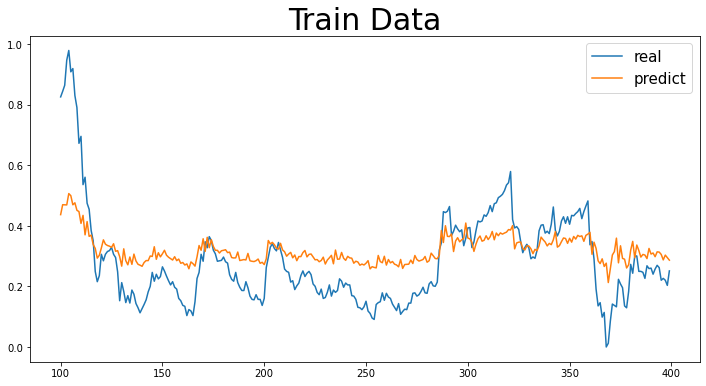

In [11]:
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:400,0].plot(figsize=(12,6))
draw.iloc[100:400,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),fontsize='15')
plt.title("Train Data",fontsize='30') #添加标题
#展示在训练集上的表现 

In [12]:
#在测试集上的预测
y_test_predict=model.predict(X_test)
y_test_predict=y_test_predict[:,0]

Text(0.5, 1.0, 'Test Data')

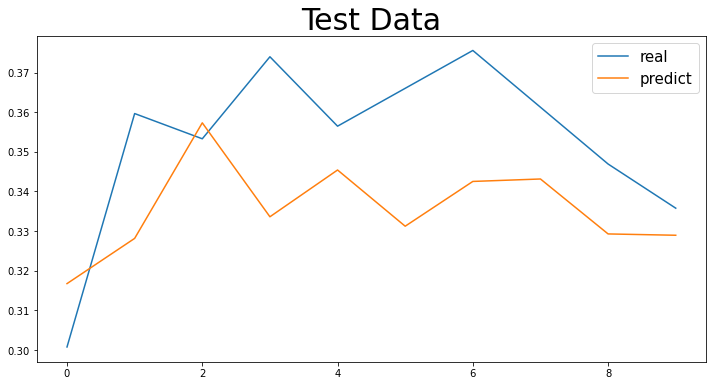

In [13]:
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') #添加标题
#展示在测试集上的表现 

In [14]:
#输出结果
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
print('训练集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_train_predict, y_train))
print(mean_squared_error(y_train_predict, y_train) )
print(mape(y_train_predict, y_train) )
print('测试集上的MAE/MSE/MAPE')
print(mean_absolute_error(y_test_predict, y_test))
print(mean_squared_error(y_test_predict, y_test) )
print(mape(y_test_predict, y_test) )
y_var_test=y_test[1:]-y_test[:len(y_test)-1]
y_var_predict=y_test_predict[1:]-y_test_predict[:len(y_test_predict)-1]
txt=np.zeros(len(y_var_test))
for i in range(len(y_var_test-1)):
    txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
result=sum(txt)/len(txt)
print('预测涨跌正确:',result)

训练集上的MAE/MSE/MAPE
0.07268003363942602
0.012282500837228398
32.03175254160058
测试集上的MAE/MSE/MAPE
0.02133346632199464
0.0006003197557769701
7.677271562405213
预测涨跌正确: 0.4444444444444444
